In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib import rc
rc('figure', figsize=(15, 5))

1) Try adding previous months max, previous 5 months sum and previous 12 months average shop wise
2) Try adding correlations within item categories, shop ids and between them  

In [2]:
sales_train = pd.read_csv(r'F:\Old_Desktop\Machine Learning Projects\Time Series\sales_train_v2.csv')
items = pd.read_csv(r'F:\Old_Desktop\Machine Learning Projects\Time Series\items.csv')
item_categories = pd.read_csv(r'F:\Old_Desktop\Machine Learning Projects\Time Series\item_categories.csv')
shops = pd.read_csv(r'F:\Old_Desktop\Machine Learning Projects\Time Series\shops.csv')
sales_test = pd.read_csv(r'F:\Old_Desktop\Machine Learning Projects\Time Series\test.csv')

In [3]:
by_month = pd.pivot_table(sales_train, index= ('item_id','shop_id'), values='item_cnt_day', columns='date_block_num',aggfunc = sum)
by_month[by_month.isnull()] = 0
by_month = by_month.reset_index()

In [4]:
by_month = by_month.join(items.loc[:,('item_id','item_category_id')].set_index('item_id'), on='item_id')

In [7]:
by_month.sort_values('shop_id').head()

,item_id,shop_id,0,1,2,3,4,5,6,7,...,25,26,27,28,29,30,31,32,33,item_category_id
216727,11861,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63
362622,18820,0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40
84152,5022,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,55
150155,8481,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,43
270802,14456,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40


In [19]:
by_month_shopid_max = by_month.groupby('shop_id').max(axis = 0)

In [25]:
months = np.arange(0,34)

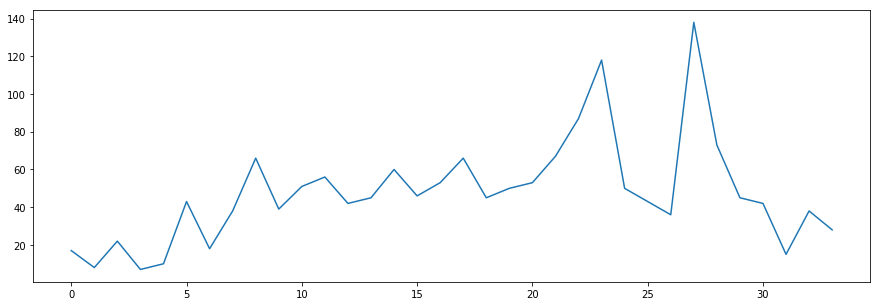

In [36]:
plt.plot(by_month_shopid_max.loc[2,months])

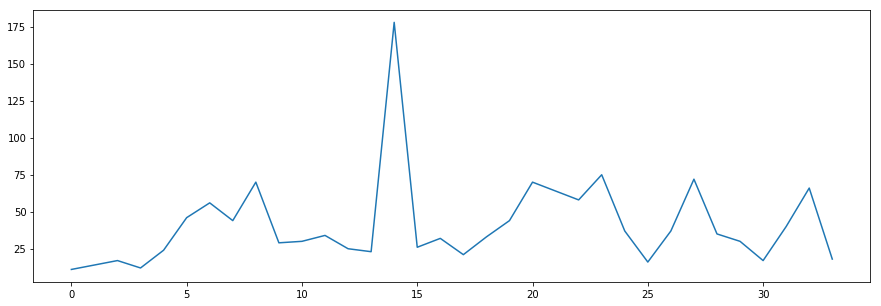

In [37]:
plt.plot(by_month_shopid_max.loc[3,months])

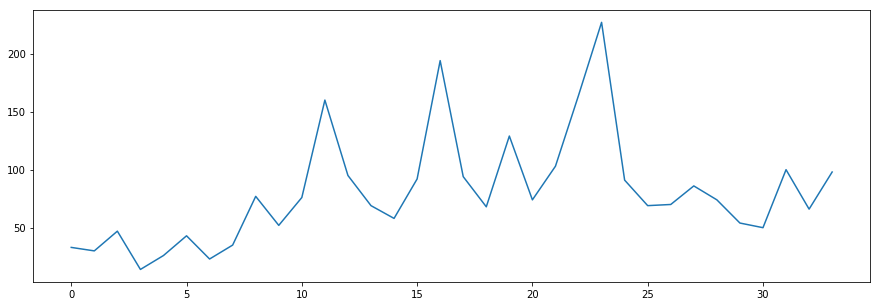

In [38]:
plt.plot(by_month_shopid_max.loc[4,months])

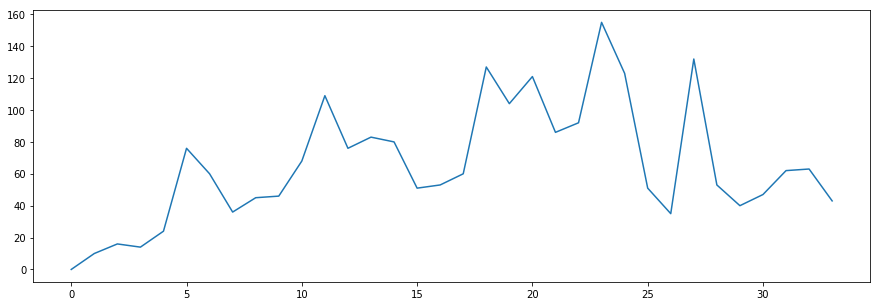

In [39]:
plt.plot(by_month_shopid_max.loc[5,months])

In [44]:
by_month_shopid_max_corr = by_month_shopid_max.loc[:,months].corr()

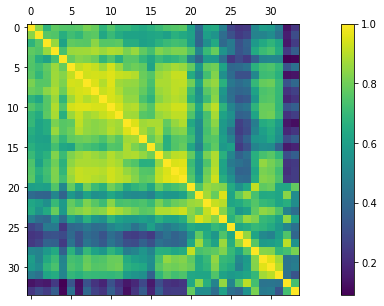

In [46]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_shopid_max_corr)
fig.colorbar(cax)

In [47]:
by_month_shopid_sum_corr = by_month.groupby('shop_id').sum(axis = 0).loc[:,months].corr()

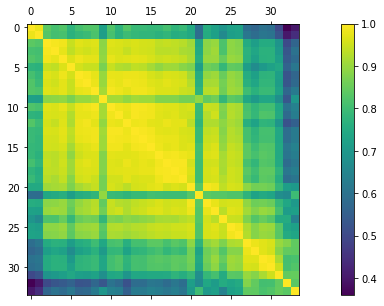

In [48]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_shopid_sum_corr)
fig.colorbar(cax)

In [50]:
by_month_shopid_item_count = by_month.groupby('shop_id')['item_id'].count()

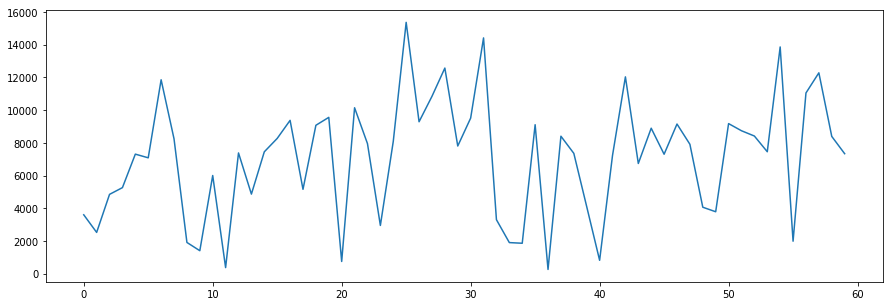

In [51]:
plt.plot(by_month_shopid_item_count)

In [136]:
by_month_shopid_average = by_month.groupby('shop_id').sum(axis = 0).divide(by_month_shopid_item_count, axis = 0).loc[:,months] 

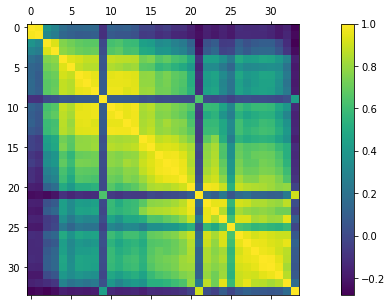

In [137]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_shopid_average.corr())
fig.colorbar(cax)

In [65]:
by_month_itcat_max = by_month.groupby('item_category_id').max(axis = 0)

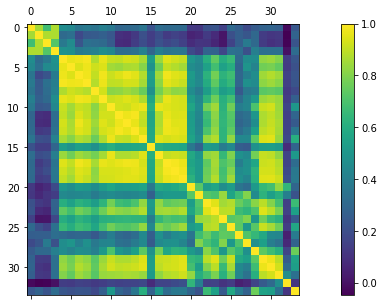

In [67]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcat_max.loc[:,months].corr())
fig.colorbar(cax)

In [68]:
by_month_itcat_sum = by_month.groupby('item_category_id').sum(axis = 0)

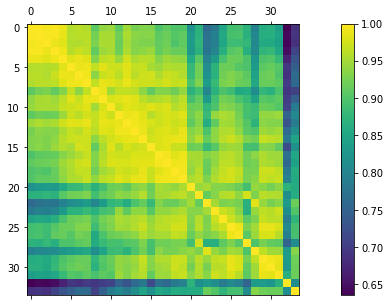

In [69]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcat_sum.loc[:,months].corr())
fig.colorbar(cax)

In [124]:
by_month_itcat_item_count = by_month.groupby('item_category_id')['item_id'].count()

In [126]:
by_month_itcat_average = by_month.groupby('item_category_id').sum(axis = 0).divide(by_month_itcat_item_count, axis = 0).loc[:,months] 

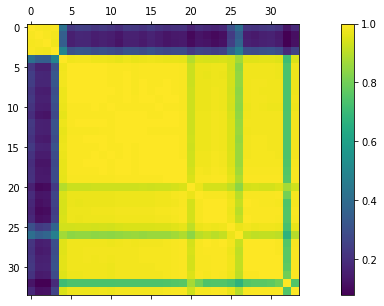

In [117]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcat_average.corr())
fig.colorbar(cax)

In [82]:
by_month_itcatshop_max = by_month.groupby(by = ('shop_id', 'item_category_id')).max(axis = 0)

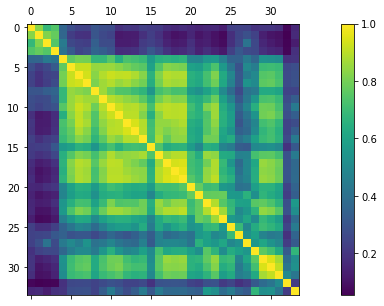

In [83]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcatshop_max.loc[:,months].corr())
fig.colorbar(cax)

In [84]:
by_month_itcatshop_sum = by_month.groupby(by = ('shop_id', 'item_category_id')).sum(axis = 0)

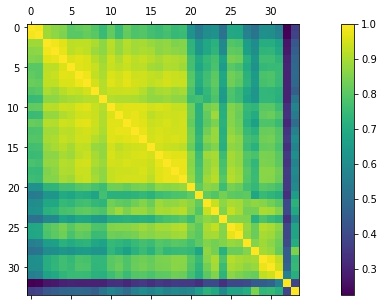

In [85]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcatshop_sum.loc[:,months].corr())
fig.colorbar(cax)

In [86]:
by_month_itcatshop_item_count = by_month.groupby(by = ('shop_id', 'item_category_id'))['item_id'].count()

In [87]:
by_month_itcatshop_average = by_month.groupby(by = ('shop_id', 'item_category_id')).sum(axis = 0).divide(by_month_itcatshop_item_count, axis = 0).loc[:,months] 

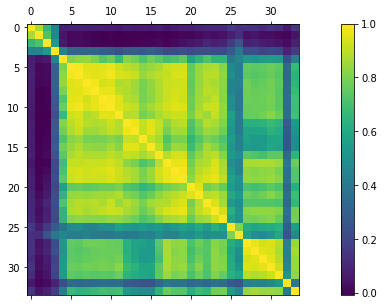

In [88]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcatshop_average.corr())
fig.colorbar(cax)

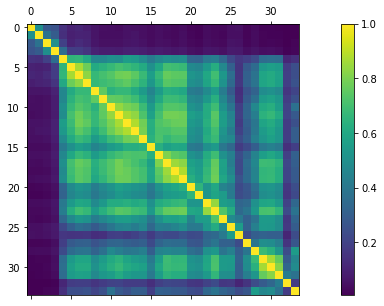

In [89]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month.loc[:,months].corr())
fig.colorbar(cax)

In [ ]:
by_month.loc[:,months].corr()

In [90]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [92]:
items.nunique()

item_name           22170
item_id             22170
item_category_id       84
dtype: int64

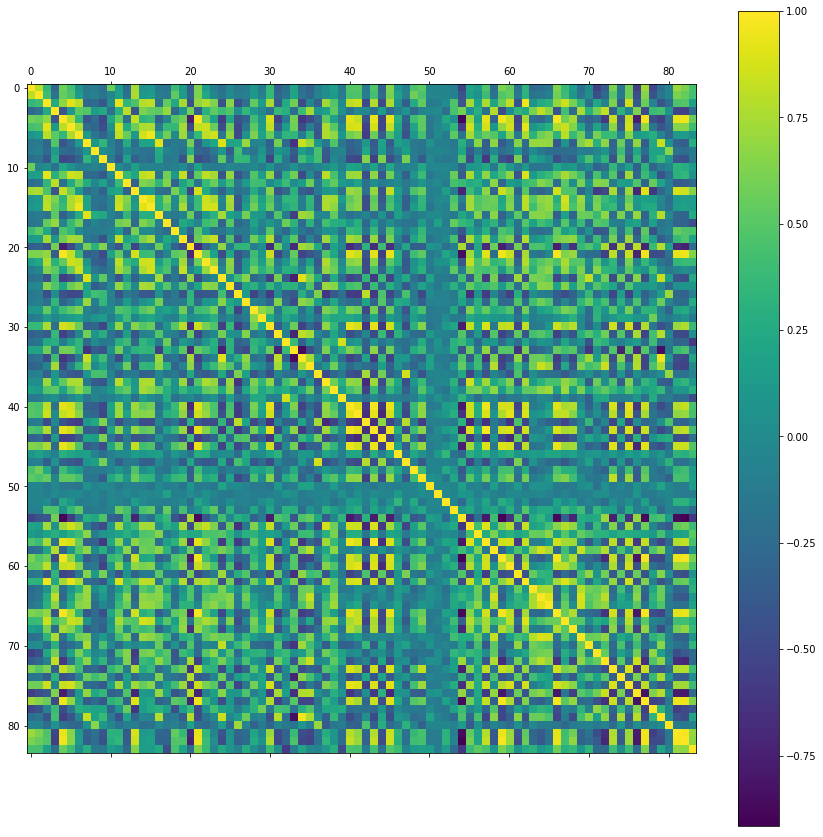

In [105]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcat_sum.loc[:,months].T.corr())
fig.colorbar(cax)

In [133]:
by_month_itcat_sum_corr = by_month_itcat_sum.loc[:,months].T.corr()

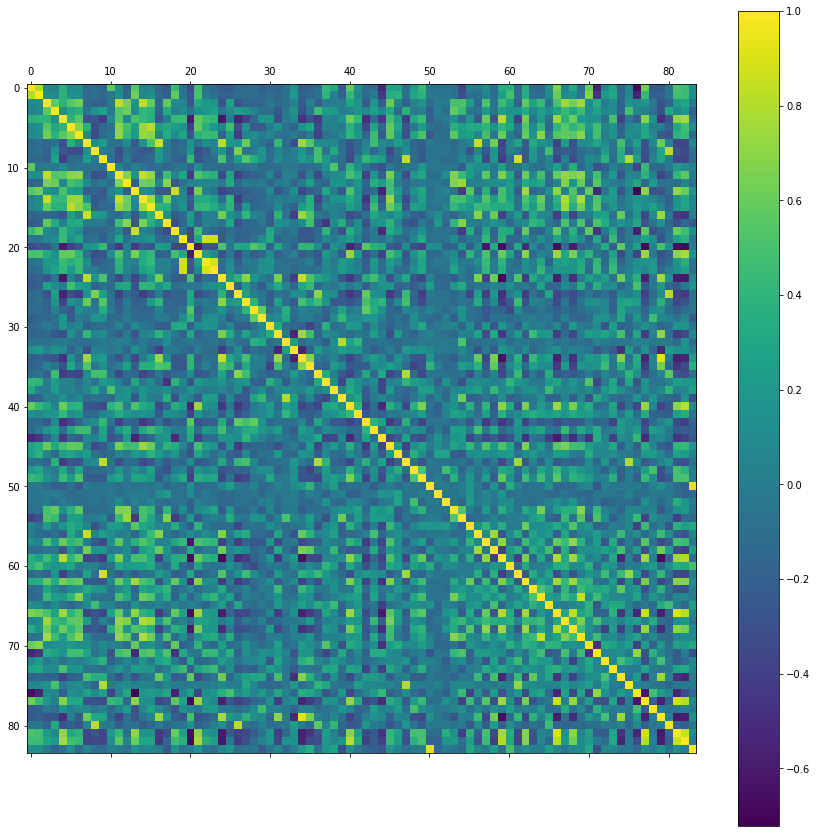

In [112]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcat_max.loc[:,months].T.corr())
fig.colorbar(cax)

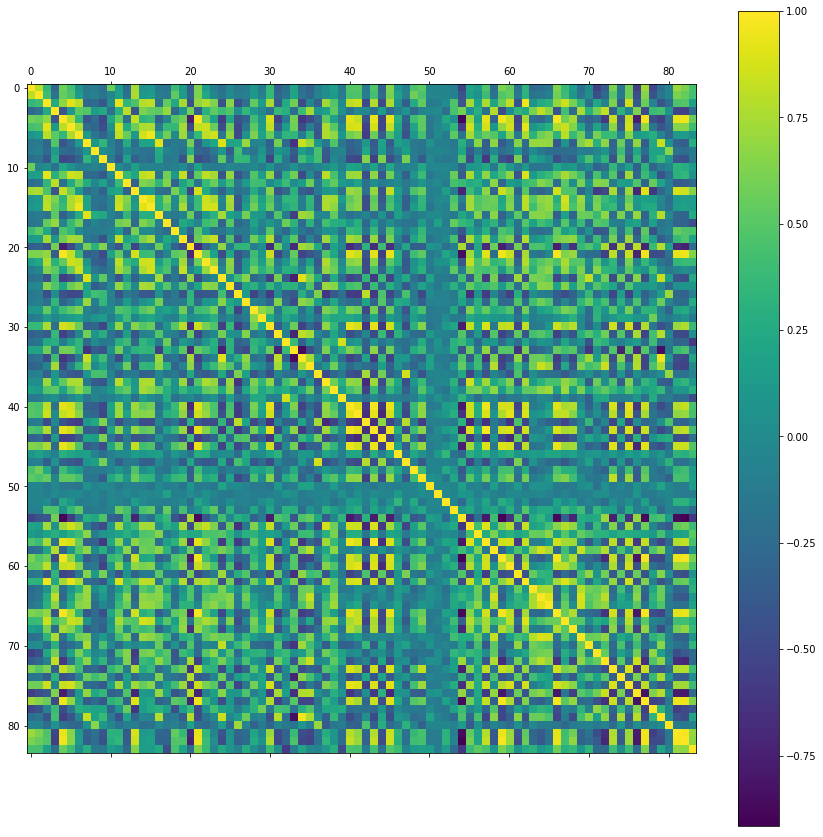

In [128]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcat_average.loc[:,months].T.corr())
fig.colorbar(cax)

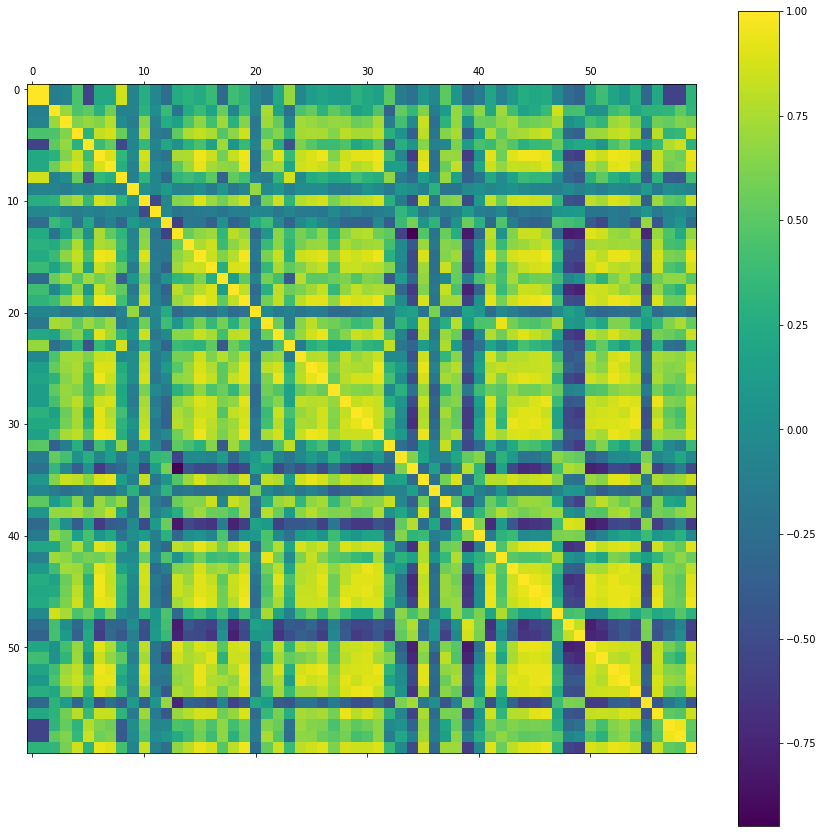

In [139]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_shopid_average.loc[:,months].T.corr())
fig.colorbar(cax)

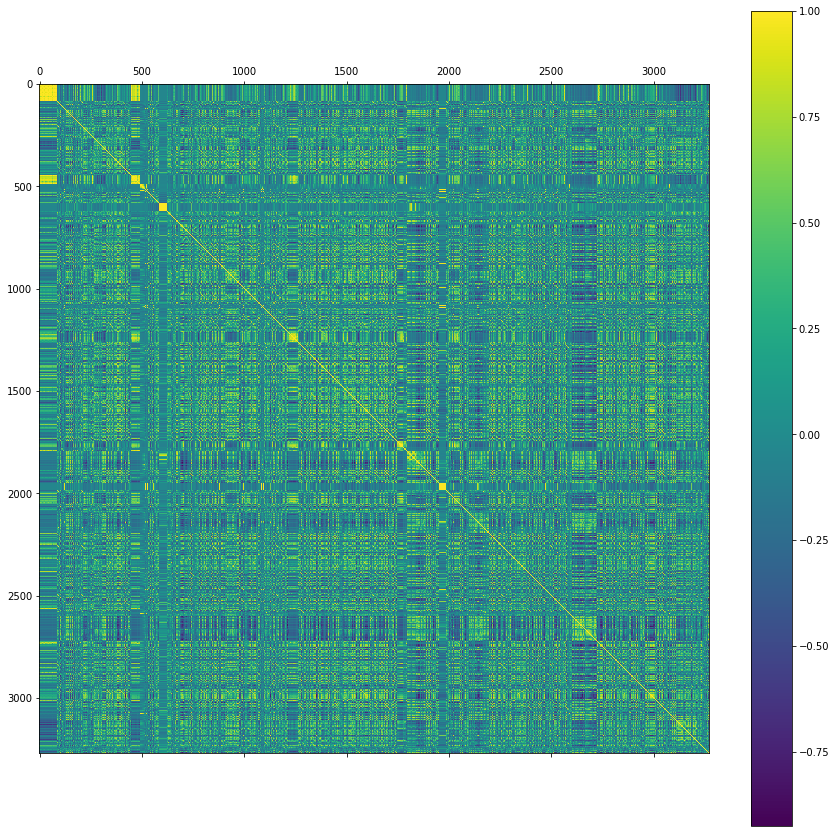

In [142]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
cax = ax.matshow(by_month_itcatshop_average.loc[:,months].T.corr())
fig.colorbar(cax)